# 데이터 로드

### 기존 데이터와 차이점
    - 너무 멀리서 찍은 사진이어서 특징이 잘 보이지 않는 경우 제외
    - 글자가 너무 크게 들어가거나 워터마크 있는 경우 제외

In [1]:
from zipfile import ZipFile
test_file_name = "./data/added_flowers_img_edited.zip"

# 폴더 이름이 ░ó╜├║╫▓╔ 이런식으로 깨져서 디코딩 옵션 추가

with ZipFile(test_file_name, 'r') as zip:
    zipInfo = zip.infolist()
    for member in zipInfo:
        try:
            print(member.filename.encode('cp437').decode('euc-kr', 'ignore'))
            member.filename = member.filename.encode('cp437').decode('euc-kr', 'ignore')
            zip.extract(member)
        except:
            print(member)
            raise Exception('what?!')

added_flowers_img/
added_flowers_img/각시붓꽃/
added_flowers_img/각시붓꽃/각시붓꽃 1.bimgvp0000004997.jpg
added_flowers_img/각시붓꽃/각시붓꽃 10.0q.25796104.1.jpg
added_flowers_img/각시붓꽃/각시붓꽃 100.bimgvp0000002138.jpg
added_flowers_img/각시붓꽃/각시붓꽃 101.3232235521_ndwfkqbl_2912da0a76225c5025ec15531f453db40a920cd9.jpg
added_flowers_img/각시붓꽃/각시붓꽃 102.15445_13167_533.jpg
added_flowers_img/각시붓꽃/각시붓꽃 103.141b2f0d4a05daed08.jpg
added_flowers_img/각시붓꽃/각시붓꽃 104.251fcd3458ec2b5d16.jpg
added_flowers_img/각시붓꽃/각시붓꽃 105.aad4f094241ad0c58081c56c7801467a.jpg
added_flowers_img/각시붓꽃/각시붓꽃 106.1292822_1257207_331.jpg
added_flowers_img/각시붓꽃/각시붓꽃 108.2013010916120_1.jpg
added_flowers_img/각시붓꽃/각시붓꽃 109.835f428588f1099ab2620856149fdaaa.jpg
added_flowers_img/각시붓꽃/각시붓꽃 11.643ea24455180c2ebd7fce4decb3817e.jpg
added_flowers_img/각시붓꽃/각시붓꽃 110..jpg
added_flowers_img/각시붓꽃/각시붓꽃 111.pimg_7674141363417992.jpg
added_flowers_img/각시붓꽃/각시붓꽃 112.080420__ea_b0_81_ec_8b_9c_eb_b6_93_ea_bd_833.jpg
added_flowers_img/각시붓꽃/각시붓꽃 113.97800ad622cdb4b64535061

In [2]:
from pathlib import Path
import imghdr
import os

data_dir = "./added_flowers_img"
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
            os.remove(filepath)
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")
            os.remove(filepath)

added_flowers_img/소나무/소나무_309.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_67.jpg is not an image
added_flowers_img/소나무/소나무_122.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_44.jpg is not an image
added_flowers_img/소나무/소나무_259.jpg is not an image
added_flowers_img/소나무/소나무_373.jpg is not an image
added_flowers_img/소나무/소나무_149.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_152.jpg is not an image
added_flowers_img/소나무/소나무_507.jpg is not an image
added_flowers_img/소나무/소나무_562.jpg is not an image
added_flowers_img/소나무/소나무_403.jpg is a webp, not accepted by TensorFlow
added_flowers_img/소나무/소나무_203.jpg is not an image
added_flowers_img/소나무/소나무_188.jpg is a webp, not accepted by TensorFlow
added_flowers_img/진달래/진달래_491.jpg is a webp, not accepted by TensorFlow
added_flowers_img/진달래/진달래_8.jpg is not an image
added_flowers_img/진달래/진달래_558.jpg is a webp, not accepted by TensorFlow
added_flowers_img/진달래/진달래_158.jpg is not an image


# 학습, 검증 데이터 분류, 배치 사이즈 할당

In [2]:
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [3]:
import pathlib

data_dir = pathlib.Path("./added_flowers_img")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

9055


In [4]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9073 files belonging to 30 classes.
Using 7259 files for training.


In [5]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 9073 files belonging to 30 classes.
Using 1814 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['각시붓꽃', '국화', '꽃아까시나무', '꽃향유', '노루귀', '노루오줌', '단풍나무', '동백나무', '목련', '무궁화', '물봉선', '밤나무', '버드나무', '벚나무', '봉선화', '산딸나무', '소나무', '수국', '수선화', '은방울꽃', '은행나무', '작약', '진달래', '참나리', '측백나무', '층꽃나무', '토끼풀', '패랭이꽃', '할미꽃', '해바라기']


# 데이터 표준화, 성능을 높이도록 데이터세트 구성

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [8]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


# ResNet 학습

In [33]:
def graph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range =  history.epochs-history.initial_epoch #range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

In [10]:
from tensorflow import keras
from tensorflow.keras import layers

# 1번방법
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.3),
        layers.experimental.preprocessing.RandomZoom(0.3),
        layers.RandomCrop(height=224, width=224)
    ]
)

# Create a model that includes the augmentation stage
input_shape = (224, 224, 3)
classes = 30
inputs = keras.Input(shape=input_shape)
# Augment images
x = data_augmentation(inputs)
# Rescale image values to [0, 1]
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
# Add the rest of the model
outputs = keras.applications.ResNet152V2(
    weights=None, input_shape=input_shape, classes=classes, classifier_activation='softmax'
)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 224, 224, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet152v2 (Functional)    (None, 30)                58393118  
                                                                 
Total params: 58,393,118
Trainable params: 58,249,374
Non-trainable params: 143,744
_________________________________________________________________


In [11]:
epochs=100
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

graph()

Epoch 1/100
227/227 [==============================] - 205s 801ms/step - loss: 2.9655 - accuracy: 0.1704 - val_loss: 3.4155 - val_accuracy: 0.1224
Epoch 2/100
227/227 [==============================] - 180s 795ms/step - loss: 2.4879 - accuracy: 0.2612 - val_loss: 2.4078 - val_accuracy: 0.2745
Epoch 3/100
227/227 [==============================] - 180s 795ms/step - loss: 2.2631 - accuracy: 0.3228 - val_loss: 3.1764 - val_accuracy: 0.2023
Epoch 4/100
227/227 [==============================] - 181s 796ms/step - loss: 2.0967 - accuracy: 0.3671 - val_loss: 2.2801 - val_accuracy: 0.3528
Epoch 5/100
227/227 [==============================] - 181s 796ms/step - loss: 1.9699 - accuracy: 0.4043 - val_loss: 2.6283 - val_accuracy: 0.3302
Epoch 6/100
227/227 [==============================] - 181s 796ms/step - loss: 1.8601 - accuracy: 0.4403 - val_loss: 3.1620 - val_accuracy: 0.2574
Epoch 7/100
227/227 [==============================] - 181s 795ms/step - loss: 1.7945 - accuracy: 0.4583 - val_loss: 3

NameError: name 'plt' is not defined

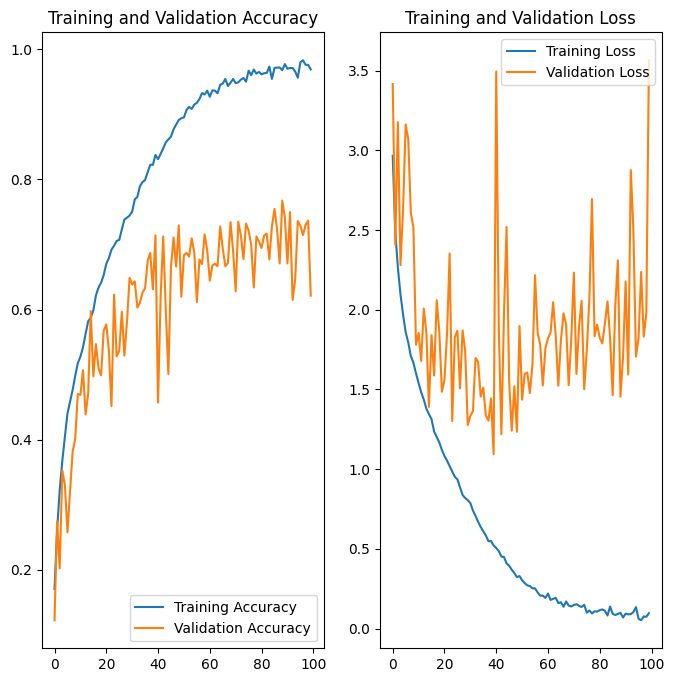

In [12]:
import matplotlib.pyplot as plt
graph()

## 데이터를 좀 손봤는데도 여전히 과적합 발생
- 그냥 class를 좀 줄여볼게요

In [16]:
import os
import shutil

delhubo=['각시붓꽃', '국화', '꽃향유', '노루귀', '노루오줌', '동백나무', '물봉선', '밤나무', '버드나무', '봉선화', '산딸나무', '소나무', '은방울꽃', '은행나무', '참나리', '측백나무', '층꽃나무', '토끼풀', '패랭이꽃', '할미꽃']
for i in delhubo:
    path='./added_flowers_img/'
    path+=i
    if os.path.exists(path):
        shutil.rmtree(path)

In [17]:
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [18]:
import pathlib

data_dir = pathlib.Path("./added_flowers_img")
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

2429


In [19]:
batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2432 files belonging to 10 classes.
Using 1946 files for training.


In [20]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2432 files belonging to 10 classes.
Using 486 files for validation.


In [21]:
class_names = train_ds.class_names
print(class_names)

['꽃아까시나무', '단풍나무', '목련', '무궁화', '벚나무', '수국', '수선화', '작약', '진달래', '해바라기']


In [22]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [23]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

normalization_layer = layers.experimental.preprocessing.Rescaling(1./255)

normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixels values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 1.0


In [27]:
from tensorflow import keras
from tensorflow.keras import layers

# 1번방법
# Create a data augmentation stage with horizontal flipping, rotations, zooms
data_augmentation = keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip("horizontal"),
        layers.experimental.preprocessing.RandomRotation(0.2),
        layers.experimental.preprocessing.RandomZoom(0.2),
        layers.RandomCrop(height=224, width=224)
    ]
)

# Create a model that includes the augmentation stage
input_shape = (224, 224, 3)
classes = 10
inputs = keras.Input(shape=input_shape)
# Augment images
x = data_augmentation(inputs)
# Rescale image values to [0, 1]
x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
# Add the rest of the model
outputs = keras.applications.ResNet50(
    weights=None, input_shape=input_shape, classes=classes
)(x)
model = keras.Model(inputs, outputs)

model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 rescaling_5 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 resnet50 (Functional)       (None, 10)                23608202  
                                                                 
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [28]:
epochs=60
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/60
61/61 [==============================] - 30s 378ms/step - loss: 2.3979 - accuracy: 0.3520 - val_loss: 2.6143 - val_accuracy: 0.0761
Epoch 2/60
61/61 [==============================] - 22s 353ms/step - loss: 1.6357 - accuracy: 0.4743 - val_loss: 3.5094 - val_accuracy: 0.0782
Epoch 3/60
61/61 [==============================] - 22s 356ms/step - loss: 1.5796 - accuracy: 0.4769 - val_loss: 2.7448 - val_accuracy: 0.1955
Epoch 4/60
61/61 [==============================] - 22s 359ms/step - loss: 1.3867 - accuracy: 0.5319 - val_loss: 7.0256 - val_accuracy: 0.1852
Epoch 5/60
61/61 [==============================] - 22s 362ms/step - loss: 1.2556 - accuracy: 0.5838 - val_loss: 29.4889 - val_accuracy: 0.1481
Epoch 6/60
61/61 [==============================] - 22s 361ms/step - loss: 1.2240 - accuracy: 0.5951 - val_loss: 27.3798 - val_accuracy: 0.3066
Epoch 7/60
61/61 [==============================] - 22s 360ms/step - loss: 1.1122 - accuracy: 0.6156 - val_loss: 12.1184 - val_accuracy: 0.2

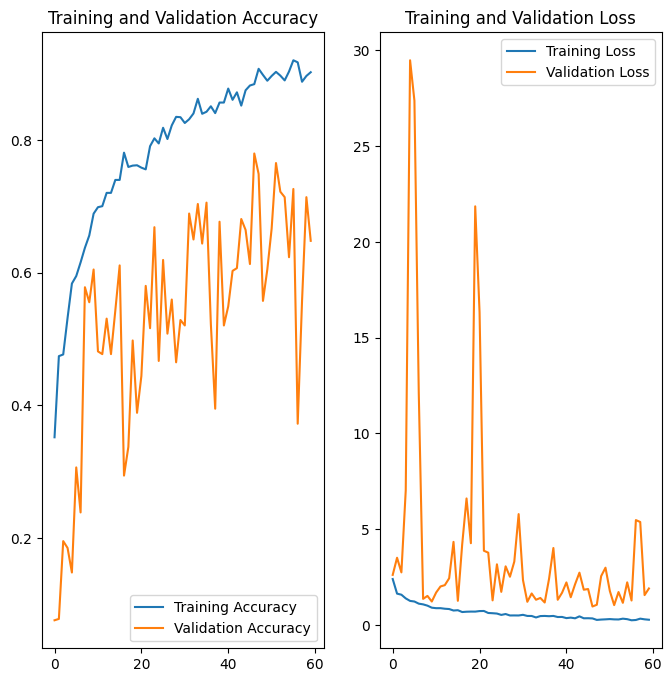

In [29]:
import matplotlib.pyplot as plt
graph()

In [30]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

history2 = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=80, initial_epoch=60
)

Epoch 61/80
61/61 [==============================] - 29s 357ms/step - loss: 0.4865 - accuracy: 0.8474 - val_loss: 4.5420 - val_accuracy: 0.5473
Epoch 62/80
61/61 [==============================] - 21s 345ms/step - loss: 0.4209 - accuracy: 0.8649 - val_loss: 4.3439 - val_accuracy: 0.5782
Epoch 63/80
61/61 [==============================] - 21s 347ms/step - loss: 0.3346 - accuracy: 0.8890 - val_loss: 3.0230 - val_accuracy: 0.6379
Epoch 64/80
61/61 [==============================] - 21s 351ms/step - loss: 0.2615 - accuracy: 0.9111 - val_loss: 1.5883 - val_accuracy: 0.6831
Epoch 65/80
61/61 [==============================] - 22s 354ms/step - loss: 0.2398 - accuracy: 0.9157 - val_loss: 2.6985 - val_accuracy: 0.5494
Epoch 66/80
61/61 [==============================] - 22s 357ms/step - loss: 0.2757 - accuracy: 0.9060 - val_loss: 2.7024 - val_accuracy: 0.6399
Epoch 67/80
61/61 [==============================] - 22s 361ms/step - loss: 0.2936 - accuracy: 0.9024 - val_loss: 1.4619 - val_accuracy:

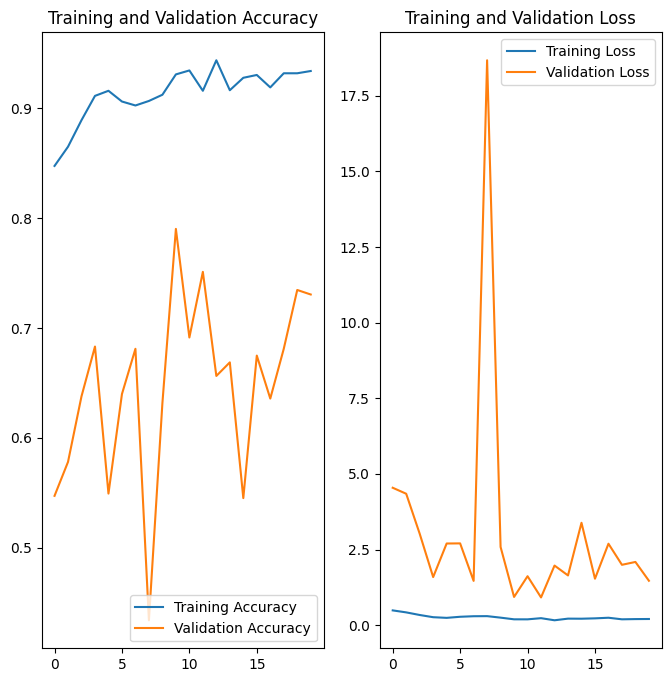

In [38]:
def graph(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss=history.history['loss']
    val_loss=history.history['val_loss']

    epochs_range = range(20)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

graph(history2)

In [50]:
sunflower_url = "https://dbscthumb-phinf.pstatic.net/2765_000_8/20180614181724424_NJODEYOLO.jpg/33581.jpg?type=m4500_4500_fst&wm=N"
sunflower_path = tf.keras.utils.get_file('1', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 24ms/step
This image most likely belongs to 벚나무 with a 23.09 percent confidence.


네이버 백과사전에 있는 이미지들로 몇개 해봤는데 못쓸정도는 아닌거 같아요. 클래스 10개만 학습한 validation 정확도 최대 79%인 모델 저장합니다.

In [51]:
 model.save("class_10_ResNet50_6_21")

INFO:tensorflow:Assets written to: class_10_ResNet50_6_21/assets


INFO:tensorflow:Assets written to: class_10_ResNet50_6_21/assets
